<a href="https://colab.research.google.com/github/mmovahed/Spectral_Methods/blob/main/PDE/Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Galerkin weighted residual method

The one-dimensional heat equation:

$ \frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2} $

Domain: $( x \in [0, L])$ and $(t \geq 0)$

Boundary conditions: $( u(0, t) = u(L, t) = 0 )$

Initial condition: $( u(x, 0) = \sin(\pi x) )$.


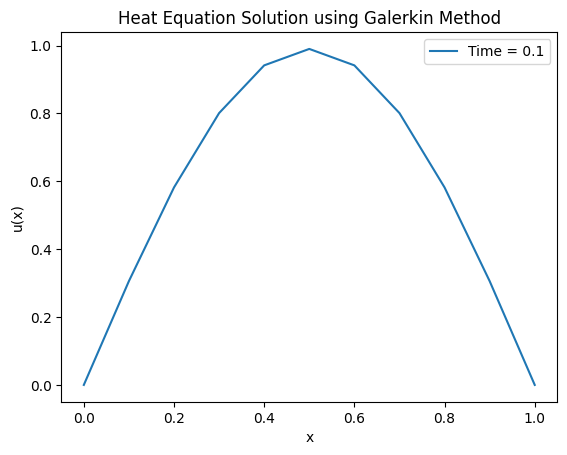

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.01    # Thermal diffusivity
L = 1.0         # Length of the rod
Nx = 10         # Number of spatial divisions
dx = L / Nx     # Spatial step size
dt = 0.0005     # Time step size
T = 0.1         # Total time
Nt = int(T / dt) # Number of time steps

# Create the spatial grid
x = np.linspace(0, L, Nx + 1)

# Initial condition
u = np.sin(np.pi * x)

# Function to compute the mass and stiffness matrices
def assemble_matrices(Nx, dx):
    M = np.zeros((Nx+1, Nx+1))
    K = np.zeros((Nx+1, Nx+1))

    for i in range(1, Nx):
        M[i, i] = 4/6 * dx
        M[i, i-1] = 1/6 * dx
        M[i, i+1] = 1/6 * dx

        K[i, i] = 2/dx
        K[i, i-1] = -1/dx
        K[i, i+1] = -1/dx

    # Apply boundary conditions
    M[0, 0] = M[Nx, Nx] = 1
    K[0, 0] = K[Nx, Nx] = 1

    return M, K

# Assemble the mass and stiffness matrices
M, K = assemble_matrices(Nx, dx)

# Time-stepping loop
for n in range(Nt):
    # Solve the linear system (M + dt * alpha * K) u_{n+1} = M u_n
    A = M + dt * alpha * K
    b = M @ u

    # Apply boundary conditions
    b[0] = 0
    b[-1] = 0

    # Solve for the next time step
    u = np.linalg.solve(A, b)

# Plot the final solution
plt.plot(x, u, label=f'Time = {T}')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Heat Equation Solution using Galerkin Method')
plt.legend()
plt.show()